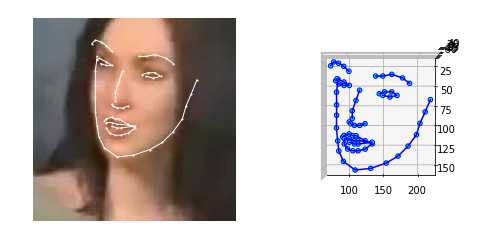

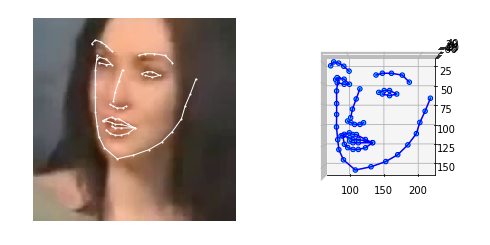

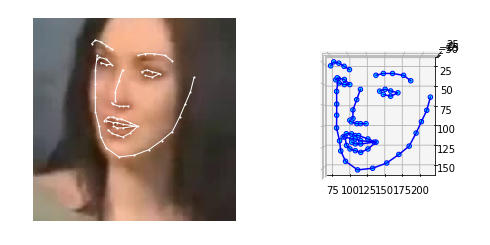

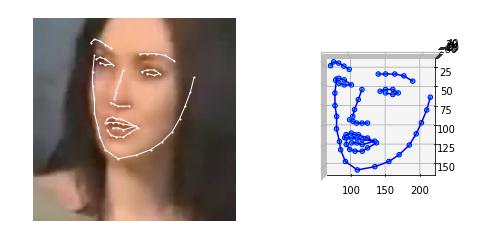

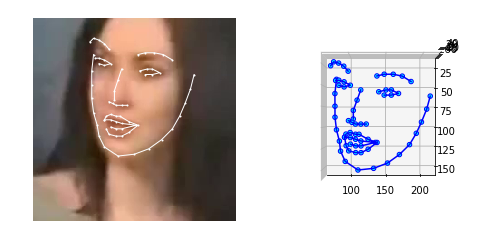

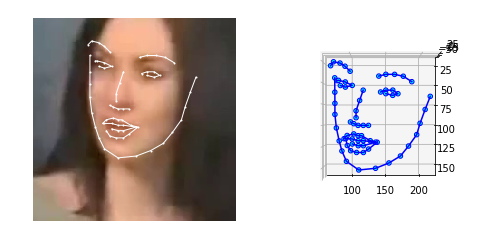

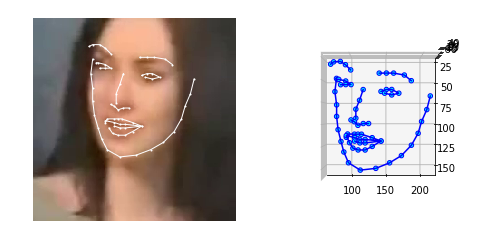

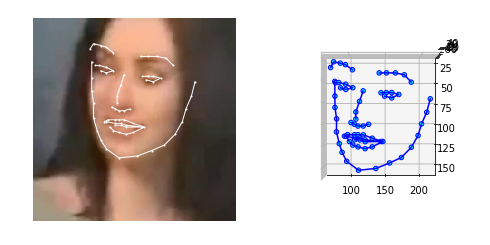

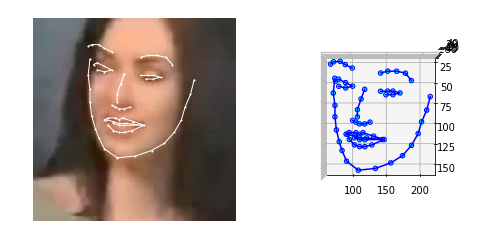

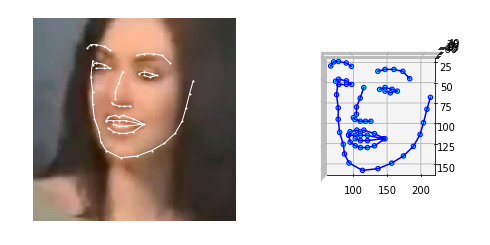

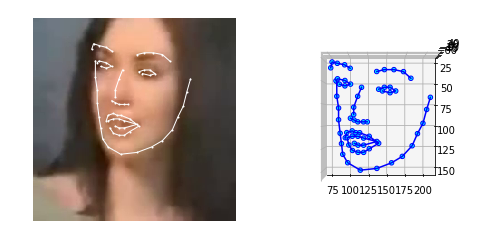

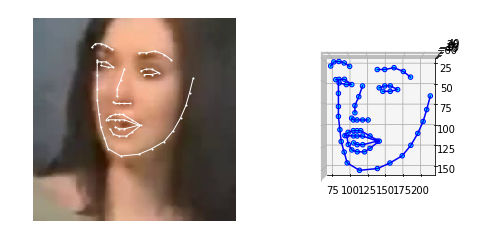

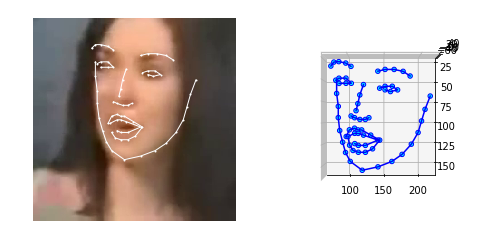

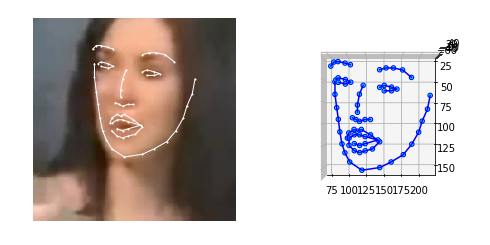

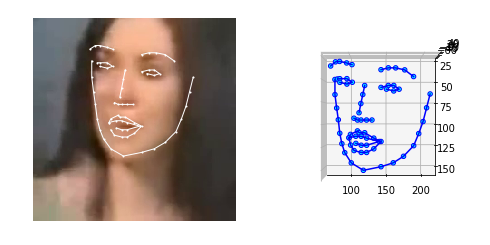

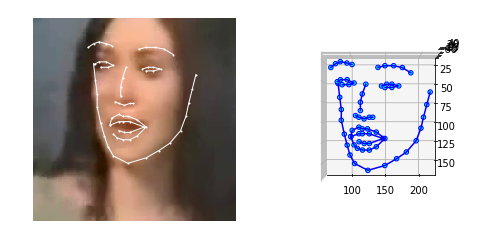

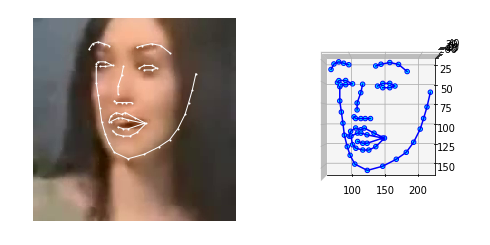

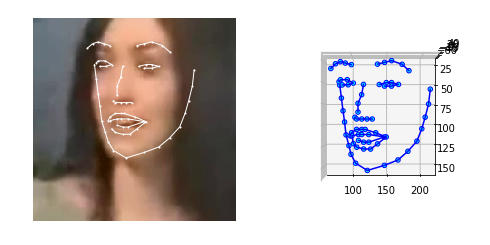

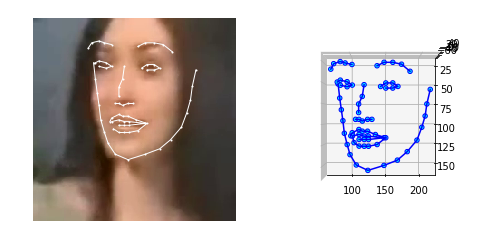

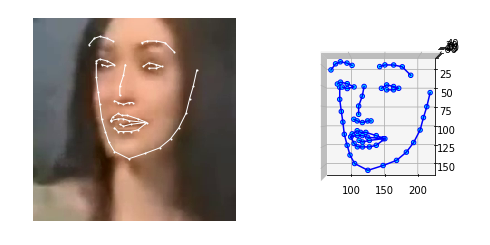

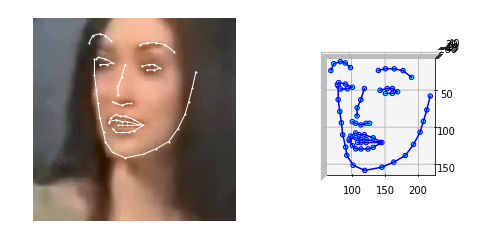

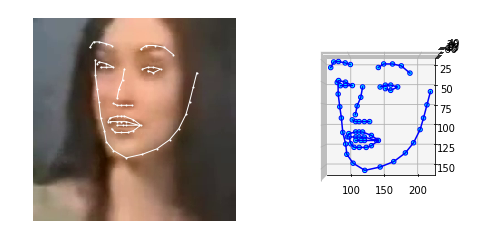

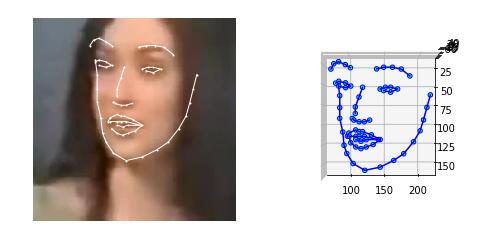

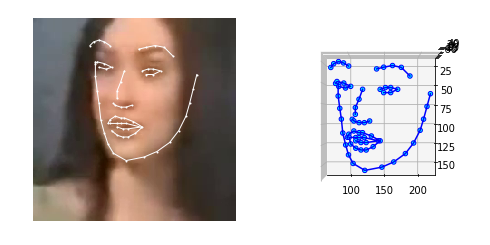

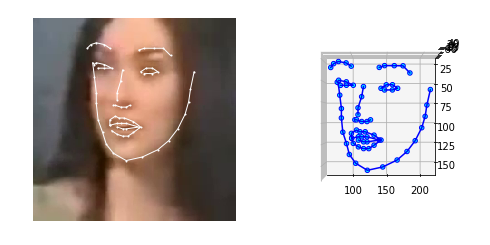

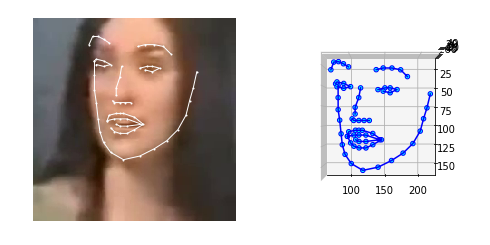

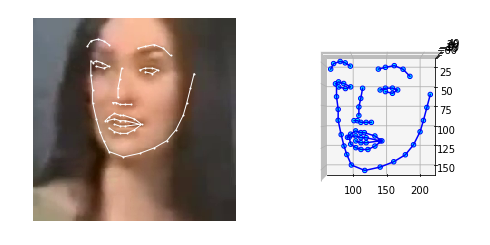

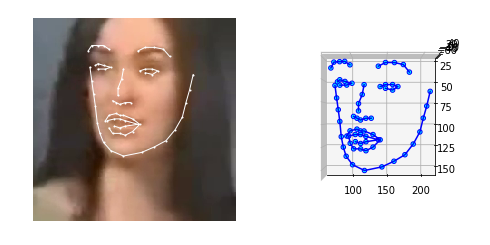

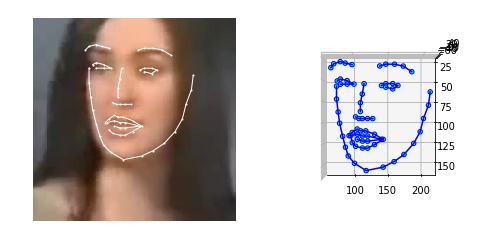

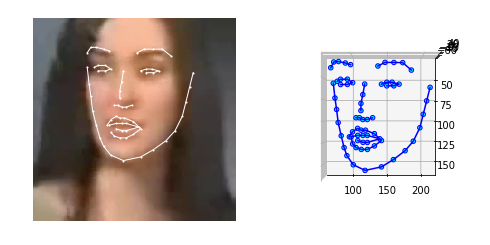

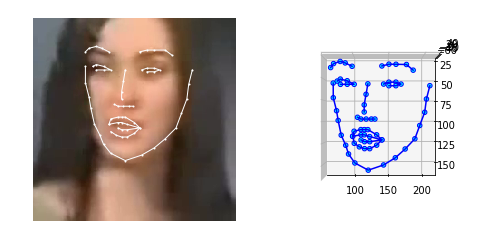

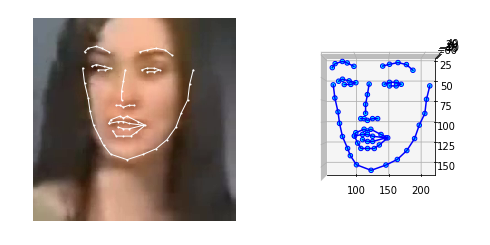

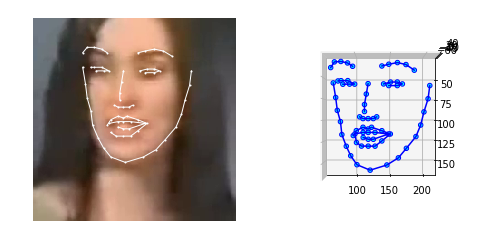

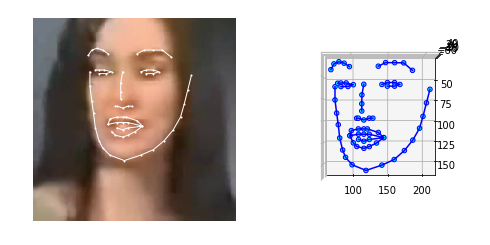

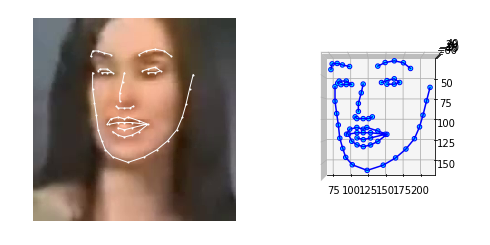

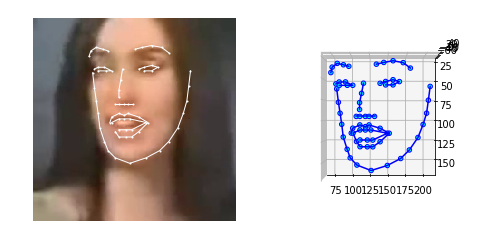

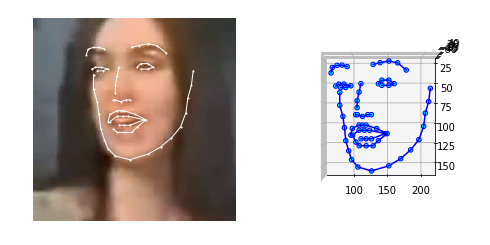

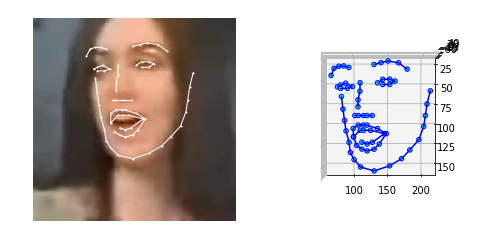

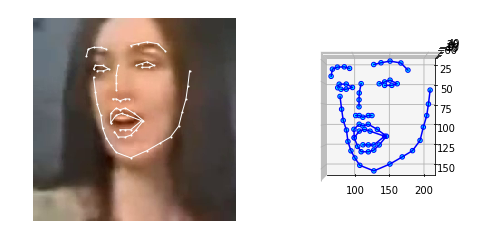

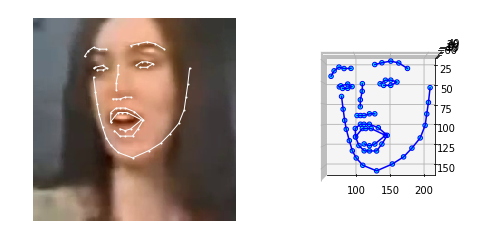

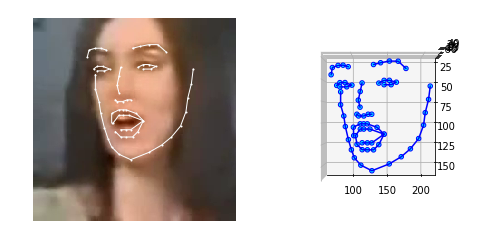

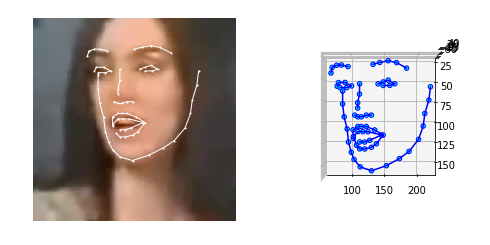

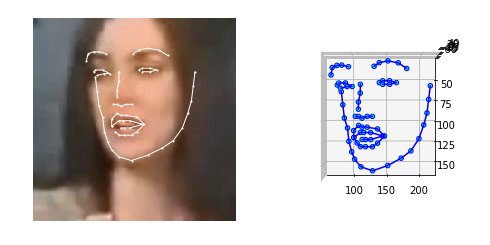

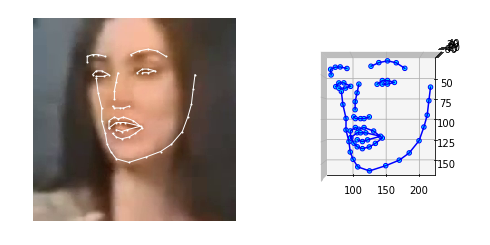

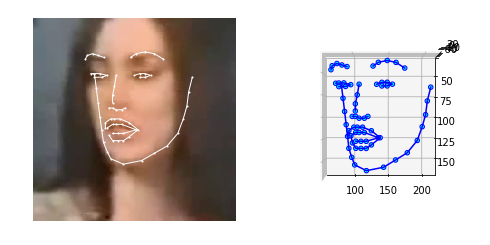

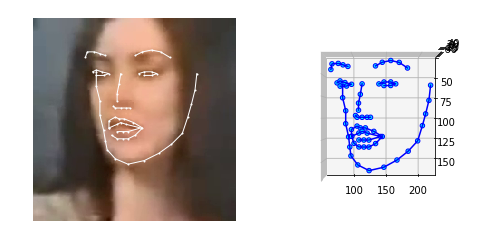

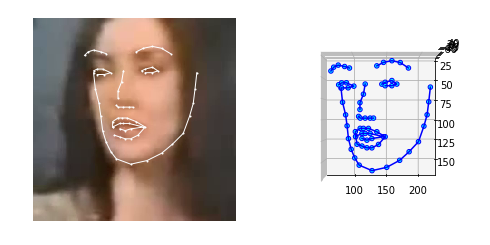

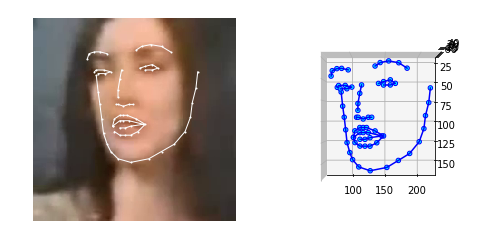

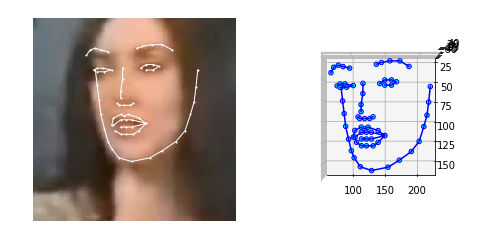

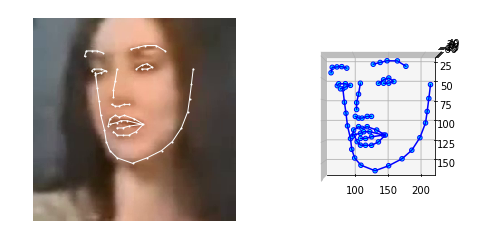

In [3]:
%matplotlib inline
######### visualization code
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from skimage import io
import cv2
import os
root = '/data2/lchen63/voxceleb'
fid = 'id06383/NDG-cqflFCw/00053'
def vis(root):
    v_path = '/data2/lchen63/voxceleb/unzip/dev_video/'+ fid + '.mp4'
    lmark_path = '/data2/lchen63/voxceleb/unzip/dev_video/' + fid + '.npy'
    cap  =  cv2.VideoCapture(v_path)
    lmark = np.load(lmark_path)
    count = 0
    tmp = v_path.split('/')
    for count in range(0,100,2):
        frame_name = os.path.join(root , 'img', tmp[-3], tmp[-2], tmp[-1][:-4] ,'%05d.png'%count)
        input = io.imread(frame_name)
        preds = lmark[count]
        #TODO: Make this nice
        fig = plt.figure(figsize=plt.figaspect(.5))
        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(input)
        ax.plot(preds[0:17,0],preds[0:17,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
        ax.plot(preds[17:22,0],preds[17:22,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
        ax.plot(preds[22:27,0],preds[22:27,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
        ax.plot(preds[27:31,0],preds[27:31,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
        ax.plot(preds[31:36,0],preds[31:36,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
        ax.plot(preds[36:42,0],preds[36:42,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
        ax.plot(preds[42:48,0],preds[42:48,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
        ax.plot(preds[48:60,0],preds[48:60,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
        ax.plot(preds[60:68,0],preds[60:68,1],marker='o',markersize=1,linestyle='-',color='w',lw=1) 
        ax.axis('off')

        ax = fig.add_subplot(1, 2, 2, projection='3d')
        surf = ax.scatter(preds[:,0]*1.2,preds[:,1],preds[:,2],c="cyan", alpha=1.0, edgecolor='b')
        ax.plot3D(preds[:17,0]*1.2,preds[:17,1], preds[:17,2], color='blue' )
        ax.plot3D(preds[17:22,0]*1.2,preds[17:22,1],preds[17:22,2], color='blue')
        ax.plot3D(preds[22:27,0]*1.2,preds[22:27,1],preds[22:27,2], color='blue')
        ax.plot3D(preds[27:31,0]*1.2,preds[27:31,1],preds[27:31,2], color='blue')
        ax.plot3D(preds[31:36,0]*1.2,preds[31:36,1],preds[31:36,2], color='blue')
        ax.plot3D(preds[36:42,0]*1.2,preds[36:42,1],preds[36:42,2], color='blue')
        ax.plot3D(preds[42:48,0]*1.2,preds[42:48,1],preds[42:48,2], color='blue')
        ax.plot3D(preds[48:,0]*1.2,preds[48:,1],preds[48:,2], color='blue' )

        ax.view_init(elev=90., azim=90.)
        ax.set_xlim(ax.get_xlim()[::-1])
        plt.show();
        print ('=======')
    
vis(root)


In [ ]:
################ get training data#################################

In [ ]:
import os
import numpy as np
print ('++++')
def get_new_txt(txt):
    root = '/data2/lchen63/voxceleb/'

    file_list = []
    txt_w = open( os.path.join(root,'txt', 'fv_dev.txt'), 'wb') 
    
    
    txt_f = open(txt, 'rb')
    list = txt_f.readlines()
    length = len(list)
    cmt = 0
    finished = []
    for p in list:
        if os.path.exists(p[:-5] + '.npy'):
            if np.load(p[:-5] + '.npy').size != 0:
                cmt += 1
#                 print (np.load(p[:-5] + '.npy').shape )
                finished.append(p)
#     print (finished)    
    print (len(finished))
    for line in finished:
        txt_w.writelines(line)
    txt_f.close()
    
# get_new_txt('/data2/lchen63/voxceleb/txt/v_dev.txt')


In [3]:
%matplotlib inline
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print ('++++')

def get_train_pair(txt):
    root = '/data2/lchen63/voxceleb/'

    file_list = []
    txt_w = open( os.path.join(root,'txt', 'pair_dev.txt'), 'wb') 
    
    
    txt_f = open(txt, 'rb')
    list = txt_f.readlines()
    length = len(list)
    cmt = 0
    finished = {}
    for p in list:
        v_path = p[:-5]        
        tmp =  v_path.split('/')
        key = os.path.join(tmp[-4],tmp[-3],tmp[-2])
        if key not in finished.keys():
            finished[key] = [0,[],np.zeros((68,3))]        
        lmark = np.load( v_path + '.npy')
        lmark_length = lmark.shape[0] 
        finished[key][1].append(tmp[-1])
        finished[key][0] += lmark_length
        finished[key][2] += np.sum(lmark, axis = 0) 
    count = 0
    for key in finished.keys():            
        finished[key][2] = finished[key][2] * 1.0 / finished[key][0]
#         fig = plt.figure(figsize=plt.figaspect(.5))
#         ax = fig.add_subplot(1, 2, 1)
#         preds = finished[key][2]
#         ax.plot(preds[0:17,0],preds[0:17,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
#         ax.plot(preds[17:22,0],preds[17:22,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
#         ax.plot(preds[22:27,0],preds[22:27,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
#         ax.plot(preds[27:31,0],preds[27:31,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
#         ax.plot(preds[31:36,0],preds[31:36,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
#         ax.plot(preds[36:42,0],preds[36:42,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
#         ax.plot(preds[42:48,0],preds[42:48,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
#         ax.plot(preds[48:60,0],preds[48:60,1],marker='o',markersize=1,linestyle='-',color='w',lw=1)
#         ax.plot(preds[60:68,0],preds[60:68,1],marker='o',markersize=1,linestyle='-',color='w',lw=1) 
#         ax.axis('off')

#         ax = fig.add_subplot(1, 2, 2, projection='3d')
#         surf = ax.scatter(preds[:,0]*1.2,preds[:,1],preds[:,2],c="cyan", alpha=1.0, edgecolor='b')
#         ax.plot3D(preds[:17,0]*1.2,preds[:17,1], preds[:17,2], color='blue' )
#         ax.plot3D(preds[17:22,0]*1.2,preds[17:22,1],preds[17:22,2], color='blue')
#         ax.plot3D(preds[22:27,0]*1.2,preds[22:27,1],preds[22:27,2], color='blue')
#         ax.plot3D(preds[27:31,0]*1.2,preds[27:31,1],preds[27:31,2], color='blue')
#         ax.plot3D(preds[31:36,0]*1.2,preds[31:36,1],preds[31:36,2], color='blue')
#         ax.plot3D(preds[36:42,0]*1.2,preds[36:42,1],preds[36:42,2], color='blue')
#         ax.plot3D(preds[42:48,0]*1.2,preds[42:48,1],preds[42:48,2], color='blue')
#         ax.plot3D(preds[48:,0]*1.2,preds[48:,1],preds[48:,2], color='blue' )

#         ax.view_init(elev=90., azim=90.)
#         ax.set_xlim(ax.get_xlim()[::-1])
#         plt.show()
        print (os.path.join(root,'unzip', key,'mean.npy'))
        np.save( os.path.join(root,'unzip', key,'mean.npy'), finished[key][2])
        count += finished[key][0]/64 -1
#         plt.show()
#         if count == 10:
#             break
#         print ('+++')
    print count
            
#     print (len(finished))
#     kk = []
#     for line in finished:
#         if finished[line][0] < 64:
#             continue
#         kk.append([line,finished[line][0],finished[line][1]])
#         txt_w.writelines(line + ':' + str(finished[line][:-1]))
#     txt_f.close()
#     print (kk[:2])
#     print (len(kk))
#     with open(os.path.join('/data2/lchen63/voxceleb/txt','train.pkl'), 'wb') as handle:
#         pickle.dump(kk, handle, protocol=pickle.HIGHEST_PROTOCOL)

    
get_train_pair('/data2/lchen63/voxceleb/txt/fv_dev.txt')


++++
/data2/lchen63/voxceleb/unzip/dev_video/id07358/OovnuNo0vic/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07588/6ffrNef8jcE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id09036/0k4Sxow9WsA/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07311/2dJLeoKXU90/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06856/CeZVgGiq4u4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04896/6tKRR11b7d8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id09189/RGx8GVptlBY/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01641/ctTlUlOBXpo/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08169/qfvVll0mG-k/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00865/sRNXcu5nUZw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00501/5vT5jO1VnHg/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03692/4LlP0pKdbq0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00979/7FwyG_cNQNw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06116/0Ma1e7SrwFQ/mean.npy
/data2/lchen63/voxceleb/unzip

/data2/lchen63/voxceleb/unzip/dev_video/id05633/_3Vl6yKyqTo/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03352/M6_dW0acuLs/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04237/0Gre9EwowsQ/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04888/rLSMrVPD2v8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04237/KPFxc9xcEmk/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01907/AxF26pClsEE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05633/zjT6MoDJ2V4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06856/uJZLNRecYhY/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05774/flDE0vJH13E/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01907/btZ43BtH1CE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00518/NdIWJNPVmGw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05466/UA3R6-ZdaN8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06683/cf3Gxl0o9mE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04236/mlVbPkUvHFc/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id05541/SYd_NfQ87E0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05633/sIPSooWBLT0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05131/IjW9qQL1AQ8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02463/OFgPh2pwq2g/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06633/_MT4eOW_A-c/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04298/ksVj5vJBGwU/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00785/MloB9C88N0o/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01262/0NmgWEbrIpw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01641/Ng0MiriAq2I/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04236/mcWFFGdomeY/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02040/kJjR5uuutrE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02495/HIDQnU660Tg/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01405/wXmxQKh6UqA/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01270/6s2a6h8tJlE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id05935/JCAPNg5mqdE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06133/e1-sQXHTJgg/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01270/W8km8liaYV4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02040/n_zJNKcLns8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02821/0ijv3AFg6bM/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01637/LP0Rs89muN0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00761/QtTNFhCCgzw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03430/UKfzcFIQLwM/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06683/lABVNltekds/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id09189/I4yuuIRlsWM/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04274/LGhwGUngTrg/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03871/nURGPKhdjsM/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05758/_ePSFwpKz2I/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07284/tatOWv6W1Us/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id08064/hdjeMFi5GtY/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03352/LDiLnBpcF0w/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06683/DMFKvzRkSYc/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02495/phcbaHsPO3M/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02578/7vcd-5LPayo/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03430/C41vFjLjYwM/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05466/76b3RQu7IU4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05344/oomunrDsrXk/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05668/p5dCDDuxYRU/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07311/AAVPOxzIBNA/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08273/cAcmW7H90bI/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01458/gM521uPwjM8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01531/17YutlTGCQY/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08766/KGDo5SS-1Bk/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id05240/c-Nzt-gOGiQ/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07182/EG0QJVKdKNc/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06552/av-gISZk5Us/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07998/9W1a4MvQqsA/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06383/SoftUKmgP_w/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04969/n4CSt1QL0H0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05758/sL4HM0tmgHk/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07423/e7YznMqCNUw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04255/GHKi-JjA16E/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03057/vqaH14fiGYA/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06588/vlgRvxTcgCk/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03864/C_X5IoZnCb0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04617/p-9j1WZ6vB4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00587/JR64TToIY7I/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id09189/2TTQWp-Bkp8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07600/y4bWcZ5dw_w/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06116/ci6bpzG0s3A/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02655/nqkk1g71s1w/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07284/mAlI8zv_0_k/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02495/IY20LHUHBsQ/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02236/d_y4D7Ybgdk/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01497/iLlp2rV9b7Q/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05253/Rk7csfRUfUQ/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03919/QKCeSntHJ6M/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02728/l2gWUnnQKRA/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02236/wk8xivUwr28/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05376/S01KbmllCek/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07858/Jt78Wx8nxv0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id01016/2SAxC4rfAhs/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08338/k1DHEyaTtko/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00804/Jw9qwlg_YJ4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04518/HaT9LLHUn8c/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08606/uv3SrcSHils/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08244/PIAYB7PPf6U/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00945/aaRlqw5Lih0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08244/aQ0N3DwpZy0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04239/59oaLvqgoPQ/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08097/dE2YyxyMexU/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08244/bFAjaTtEoYM/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08629/mEcXaNDhjgg/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03057/mwYrC-X3fp8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06856/GaTIS7k0Was/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id02578/qwOvfCfiXzE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06552/gZES_cCO62E/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04914/0dFws65aJkY/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id09055/aymxJa6o-Ww/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01070/8T9WiAWjK6c/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03430/X1g1UlmjxNA/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04274/SFxyYQgCyjo/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04236/CVXQJA8GLXk/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02878/SxrN7WFKOx8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06343/airRoymAoqY/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04153/zrivJuEBLz8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04397/8tu5mYIPL8s/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08950/XnblesC58PE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00804/sAB4e6yViO8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id04336/GuIkZFmS5l4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00395/rsSpJwdNpw4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00979/CaWVBeyolLk/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id09055/N_ZVlK_zTAw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08303/t6HvlQgP8vc/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00979/QVgFZs9F_2U/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01806/DCZQt_0nZIE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00406/c4oby4Hly6M/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03538/m4g9NqRUmLw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01270/mgrXl9YWsv8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08239/pGlHT_PYxdw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02484/LUoHK7Cufe8/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01641/PuCT9CEOOfE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00587/6L1L4Vnae6I/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id02956/Bh2qz-hJFSM/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04274/zpT-gOVjH0Y/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06111/kfwTbUqy-80/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08303/F8Au7OC9OMI/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02729/6EYol0uxgxs/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08584/tO3lKkTlR88/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05062/bxWT6BgDZjI/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01994/6D9YbnUhGYo/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id00785/NMHOP4N6KE4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id06856/Hwq_h-WAXAE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01405/JhamlGoIubo/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03057/tfnmCnF8SL4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04024/1VgTVamJUBQ/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07756/xmbmseA6nGE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

/data2/lchen63/voxceleb/unzip/dev_video/id05062/zkcFqbfXsJw/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05668/QZAB2QLbxtM/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id04518/tSECc81332w/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id03381/bPLOrdQ0PEs/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07128/86PDfL_fhc0/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01405/wvy45yAJ4fg/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id07525/kEoUOOXkMPY/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05633/Dbyb8ltD4Og/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id02592/cVw1EY986lA/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id08879/EAK6uabVpns/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id09063/IqG3fRbQX40/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id05054/Zr-UL0kfaCE/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01637/RsYWdLGAxI4/mean.npy
/data2/lchen63/voxceleb/unzip/dev_video/id01907/daca-4nk2Zo/mean.npy
/data2/lchen63/voxceleb/unzip/dev_

In [ ]:
import librosa
import python_speech_features
print ('===========')
def audio2mfcc(txt):
    count = 0
    txt_f = open(txt, 'rb')
    list = txt_f.readlines()
    length = len(list)            
    for line in list:
#         if count > 5:
#             break
        print ('{}/{}'.format(count, length))
        audio_path = line[:-5].replace('dev_video', 'dev_audio') + '.m4a'


        audio,fs = librosa.core.load(audio_path,sr = 16000 )
        mfcc = python_speech_features.mfcc(audio,16000,winstep=0.01)
        mfcc_name = line[:-5].replace('dev_video', 'dev_audio')  + '.npy'
#         print mfcc_name
#         print (mfcc.shape)
        np.save(mfcc_name, mfcc)
    count += 1
#     print (count)
# audio2mfcc('/data2/lchen63/voxceleb/txt/fv_dev.txt')


In [3]:
# import numpy as np
# print ('========')
# a  = np.ones((100,3,4))
# # print (a)
# print (np.sum(a, axis = 0).shape)
[['dev_video/id07358/OovnuNo0vic', 700, ['00163', '00161', '00162'], array([[ 7.94485714e+01,  5.05357143e+01, -7.66302441e+01],

(3, 4)
